In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for better visualizations
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance #For feature importance

# ... (Data loading, cleaning, preprocessing - same as before)

# Feature Selection (same as before)
X = df[['Genre', 'Director', 'Actors', 'Year', 'Duration']]
y = df['Rating']

# Train-Test Split (same as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training and Cross-Validation (same as before)
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation (same as before)
mse_train = mean_squared_error(y_train, model.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) #R-squared

print(f"Cross-Validation MSE Scores: {-cv_scores}")




Cross-Validation MSE Scores: [1.44416681 1.42914376 1.6081695  1.48465455 1.52507819]


In [ ]:
print(f"Average Cross-Validated MSE: {-np.mean(cv_scores):.2f}")


Average Cross-Validated MSE: 1.50


In [ ]:
print(f"Training MSE: {mse_train:.2f}")


Training MSE: 1.35


In [ ]:
print(f"Test MSE: {mse_test:.2f}")


Test MSE: 1.41


In [ ]:
print(f"R-squared: {r2:.2f}") #Print R-squared

R-squared: 0.24


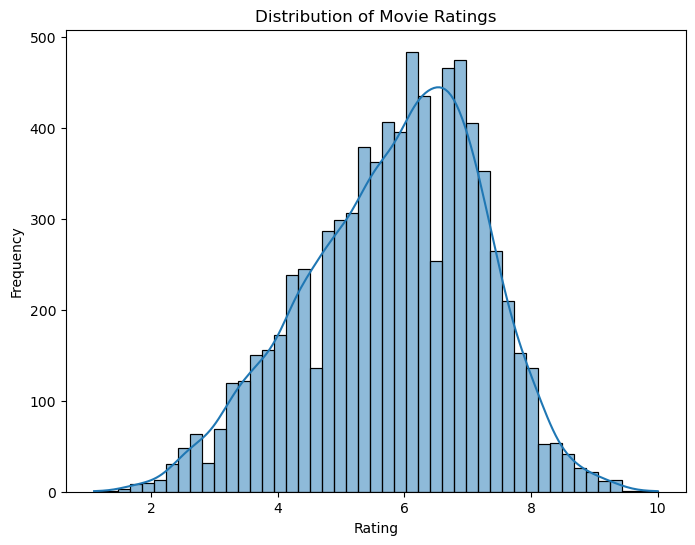

In [ ]:


# 1. Distribution of Ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], kde=True) #Use seaborn's histplot
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


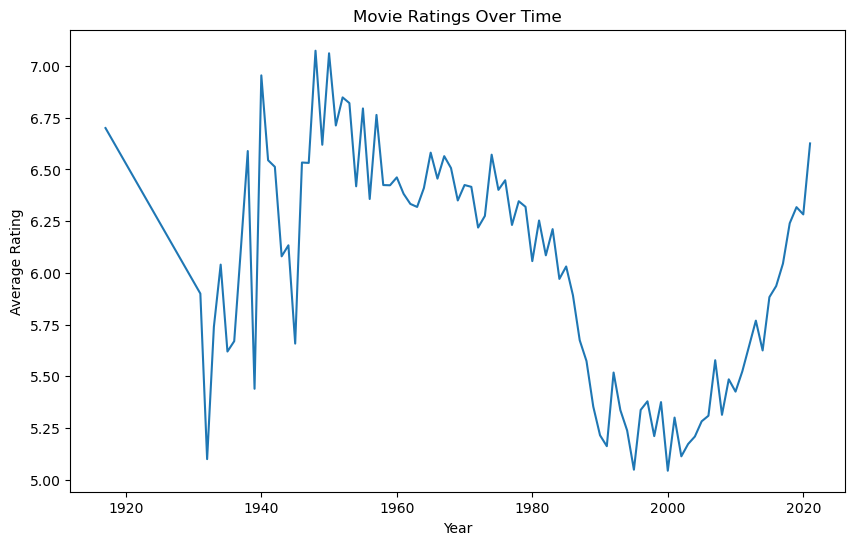

In [ ]:
# 2. Ratings vs. Year
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Rating', data=df, errorbar =None) #Use seaborn's lineplot
plt.title('Movie Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()



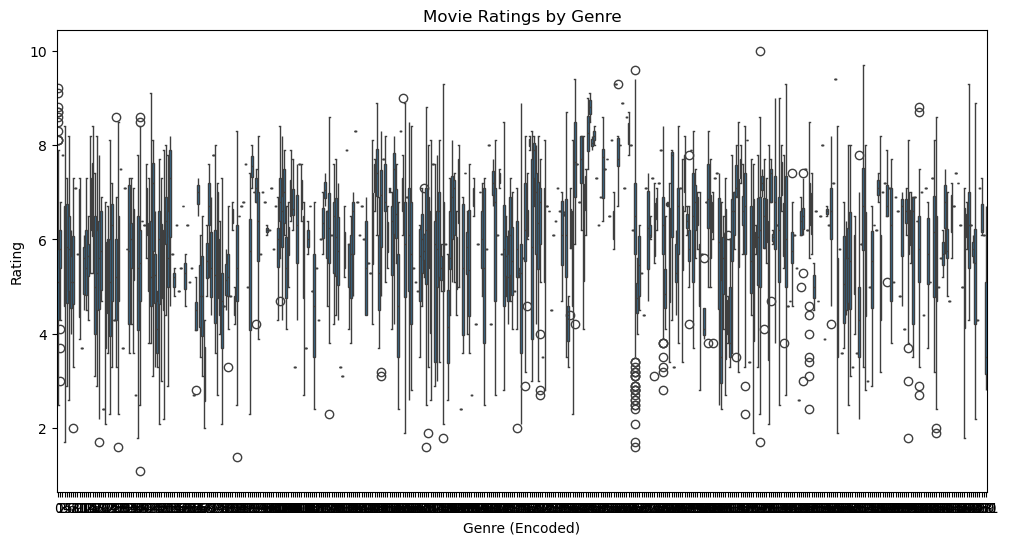

In [ ]:
# 3. Ratings by Genre (using the label-encoded values)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Rating', data=df) #Seaborn boxplot
plt.title('Movie Ratings by Genre')
plt.xlabel('Genre (Encoded)')
plt.ylabel('Rating')
#plt.xticks(rotation=45, ha='right') 
plt.show()



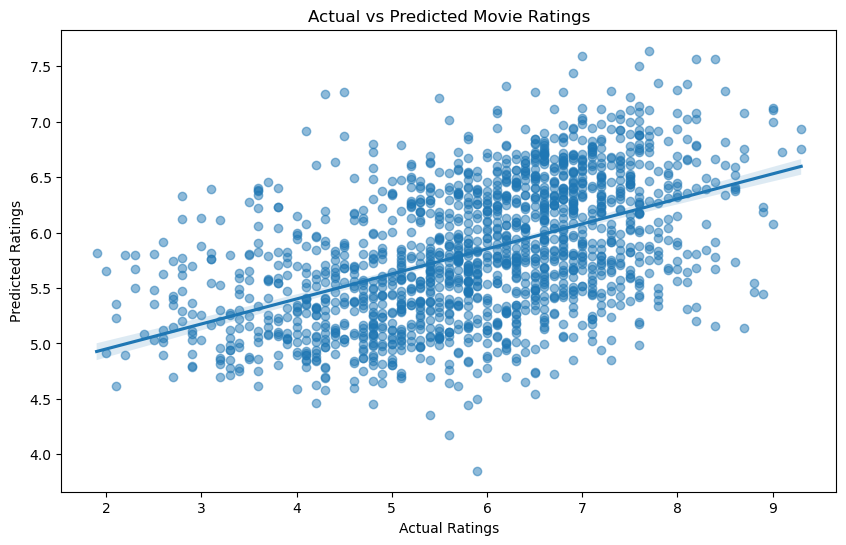

In [ ]:
# 4. Actual vs. Predicted Ratings (improved)
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5}) #Seaborn regplot for scatter with regression line
plt.title('Actual vs Predicted Movie Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()




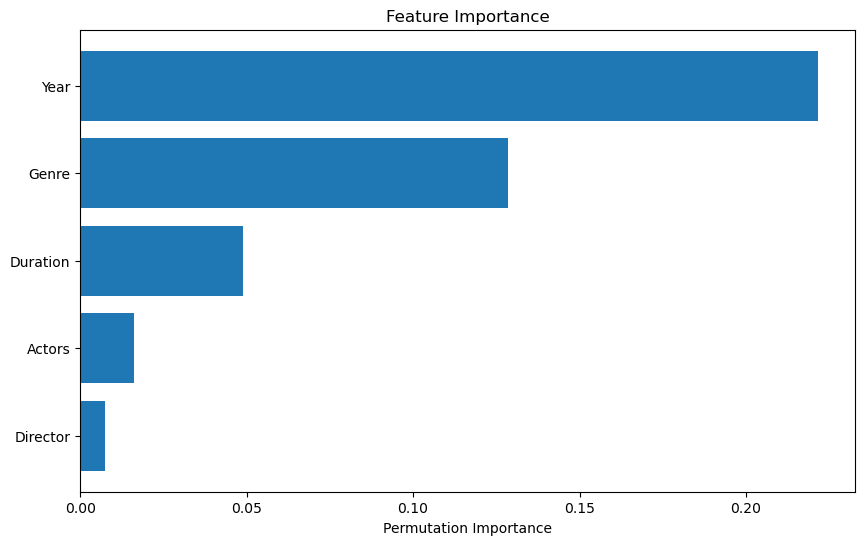

In [ ]:
# 5. Feature Importance
importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

sorted_idx = importance.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance")
plt.show()




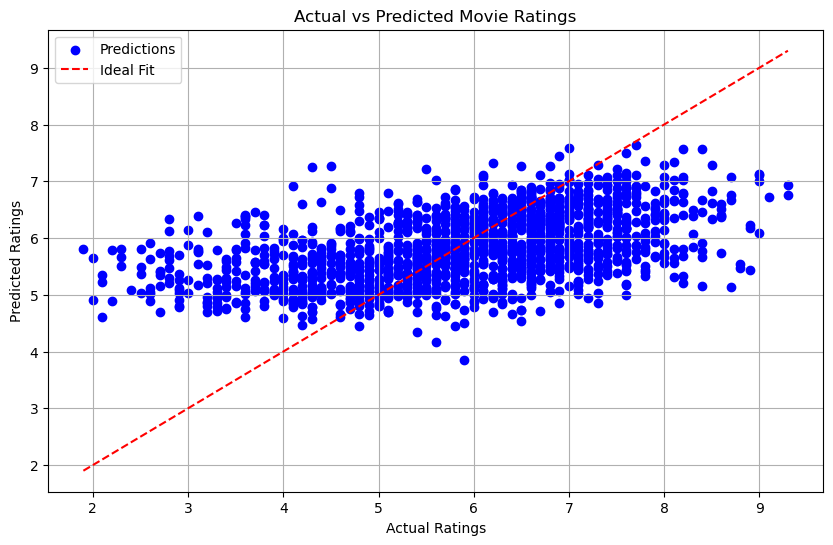

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.title('Actual vs Predicted Movie Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.legend()
plt.grid(True)
plt.show()